# Importing Necessary Libraries

In [23]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, mixed_precision
from sklearn.metrics import classification_report, confusion_matrix

# Defining Model Architecture and Data Loading

In [9]:
def cnn(input_shape, num_classes):
    model = tf.keras.Sequential([
        layers.Conv2D(64, (3, 3), activation = "relu", padding = "same", input_shape = input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation = "relu", padding = "same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation = "relu", padding = "same"),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation = "relu", padding = "same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        
        # Can include these layers for more complexity
        # layers.Conv2D(256, (3, 3), activation = "relu", padding = "same"),
        # layers.BatchNormalization(),
        # layers.Conv2D(256, (3, 3), activation = "relu", padding = "same"),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),

        # layers.Conv2D(512, (3, 3), activation = "relu", padding = "same"),
        # layers.BatchNormalization(),
        # layers.Conv2D(512, (3, 3), activation = "relu", padding = "same"),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),

        # layers.Conv2D(1024, (3, 3), activation = "relu", padding = "same"),
        # layers.BatchNormalization(),
        # layers.Conv2D(1024, (3, 3), activation = "relu", padding = "same"),
        # layers.BatchNormalization(),
        # layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation = "relu"),
        layers.BatchNormalization(),
        
        layers.Dense(64, activation = "relu"),
        layers.BatchNormalization(),

        layers.Dense(32, activation = "relu"),
        layers.BatchNormalization(),

        layers.Dense(num_classes, activation = "softmax")
    ])

    return model

In [12]:
dir = "../Dataset/Intel/seg_train/"

batch_size = 16
img_h, img_w = 150, 150

train_dataset = tf.keras.utils.image_dataset_from_directory(dir, seed = 100, image_size = (img_h, img_w), batch_size = batch_size, shuffle = True)

Found 14034 files belonging to 6 classes.


# Model Initialization

In [14]:
model = cnn(input_shape = (150, 150, 3), num_classes = 6)

## Model Architecture Summary and Visualization

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                        

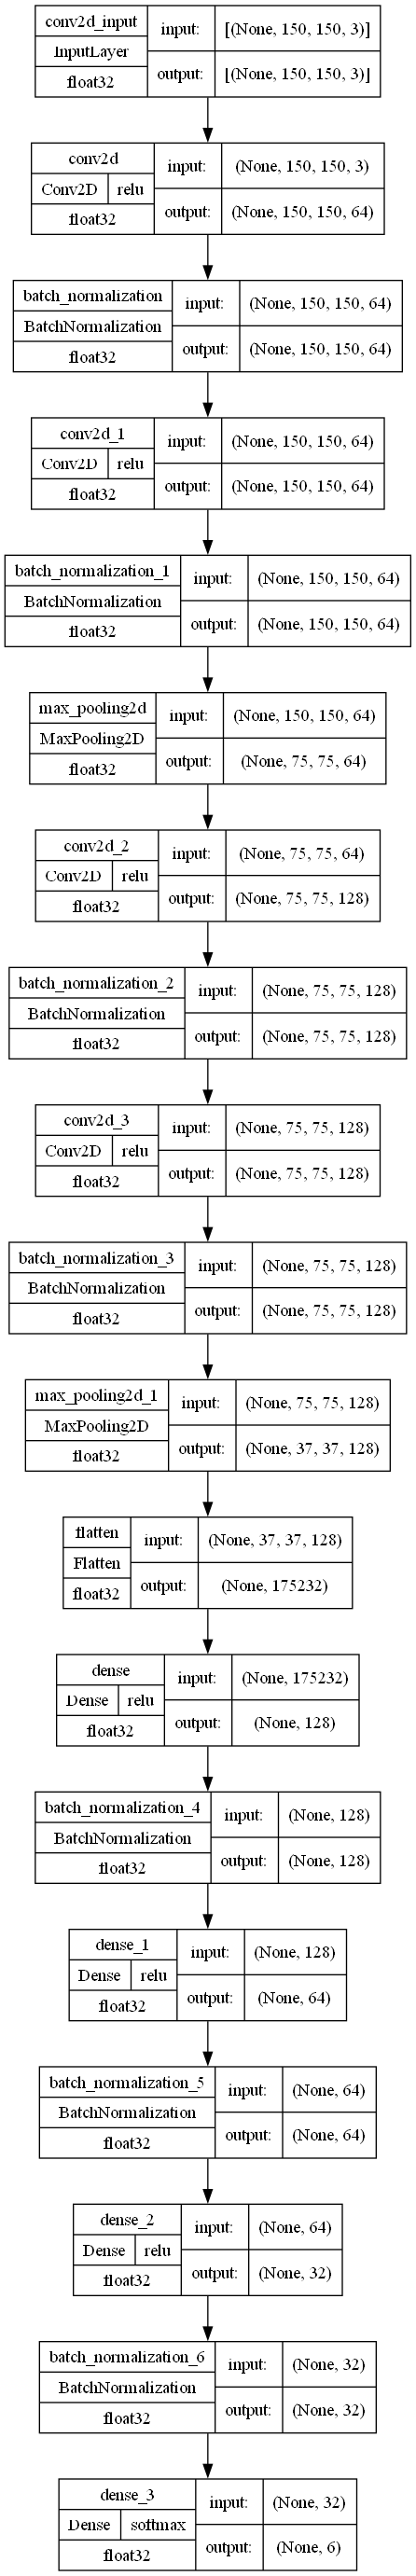

In [25]:
plot_model(model, show_layer_names = True, show_dtype = True, show_layer_activations = True, show_shapes = True)

## Training

In [15]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [17]:
with tf.device("/GPU:0"):
    history = model.fit(train_dataset, epochs = 10)

Epoch 1/10
878/878 [==============================] - 88s 96ms/step - loss: 0.8954 - accuracy: 0.6638
Epoch 2/10
878/878 [==============================] - 87s 99ms/step - loss: 0.6277 - accuracy: 0.7701
Epoch 3/10
878/878 [==============================] - 87s 99ms/step - loss: 0.5707 - accuracy: 0.7959
Epoch 4/10
878/878 [==============================] - 88s 100ms/step - loss: 0.4522 - accuracy: 0.8353
Epoch 5/10
878/878 [==============================] - 88s 100ms/step - loss: 0.3931 - accuracy: 0.8603
Epoch 6/10
878/878 [==============================] - 88s 100ms/step - loss: 0.3321 - accuracy: 0.8826
Epoch 7/10
878/878 [==============================] - 88s 100ms/step - loss: 0.2473 - accuracy: 0.9147
Epoch 8/10
878/878 [==============================] - 88s 100ms/step - loss: 0.1901 - accuracy: 0.9329
Epoch 9/10
878/878 [==============================] - 87s 99ms/step - loss: 0.1389 - accuracy: 0.9528
Epoch 10/10
878/878 [==============================] - 87s 99ms/step - loss: 

# Saving The Model

In [62]:
model.save("../Models/Intel/Model Without Transfer Learning.h5")

# Model Evaluation and Other Metrics

## Loss and Accuracy Graphs

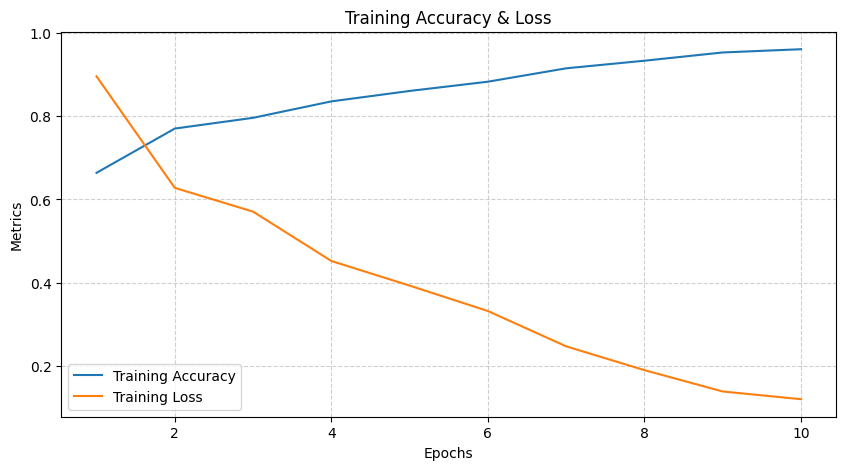

In [66]:
# Plot training accuracy and loss
def plot_loss_accuracy(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 5))  # Adjust size

    # Plot accuracy and loss on the same graph
    plt.plot(epochs, acc, label='Training Accuracy')  # Blue line with circles
    plt.plot(epochs, loss, label='Training Loss')  # Red line with triangles
    
    # Labels & title
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Training Accuracy & Loss')
    
    # Grid and legend
    plt.grid(True, linestyle='--', alpha=0.6)  # Dashed gridlines
    plt.legend()

    plt.show()

plot_loss_accuracy(history)

## Confusion Matrix and Classification Report

In [69]:
dir = "../Dataset/Intel/seg_test"

batch_size = 16
img_h, img_w = 150, 150

test_dataset = tf.keras.utils.image_dataset_from_directory(dir, seed = 100, image_size = (img_h, img_w), batch_size = batch_size, shuffle = False)

Found 3000 files belonging to 6 classes.


188/188 [==============================] - 2s 13ms/step
📊 Classification Report:

              precision    recall  f1-score   support

   buildings       0.86      0.80      0.83       437
      forest       0.93      0.96      0.94       474
     glacier       0.79      0.66      0.72       553
    mountain       0.78      0.75      0.77       525
         sea       0.75      0.88      0.81       510
      street       0.83      0.88      0.86       501

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



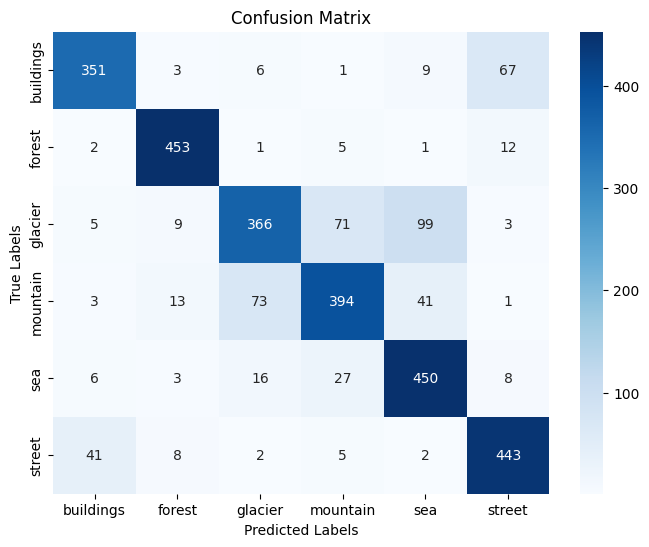

In [75]:
y_true = np.concatenate([labels.numpy() for _, labels in test_dataset])

# Get model predictions
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define class names
class_names = test_dataset.class_names

# Generate Classification Report
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Inference

## Importing the necessary libraries

In [52]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random
import math

In [54]:
model = load_model("../Models/Intel/Model Without Transfer Learning.h5")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4050 Laptop GPU, compute capability 8.9


In [56]:
def inference_grid(img_paths, grid_cols=3):
    class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    
    num_images = len(img_paths)
    grid_rows = math.ceil(num_images / grid_cols)  # Calculate number of rows needed

    plt.figure(figsize=(grid_cols * 4, grid_rows * 4))  # Adjust figure size dynamically

    for i, img_path in enumerate(img_paths):
        img = cv2.imread(img_path)

        # Preprocess image
        img_expanded = np.expand_dims(img, axis=0)

        prediction = model.predict(img_expanded)
        predicted_class = np.argmax(prediction, axis=1)[0]
        predicted_label = class_names[predicted_class]

        # Plot image in a grid
        plt.subplot(grid_rows, grid_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{predicted_label}", fontsize=12)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

1/1 [==============================] - 0s 16ms/step


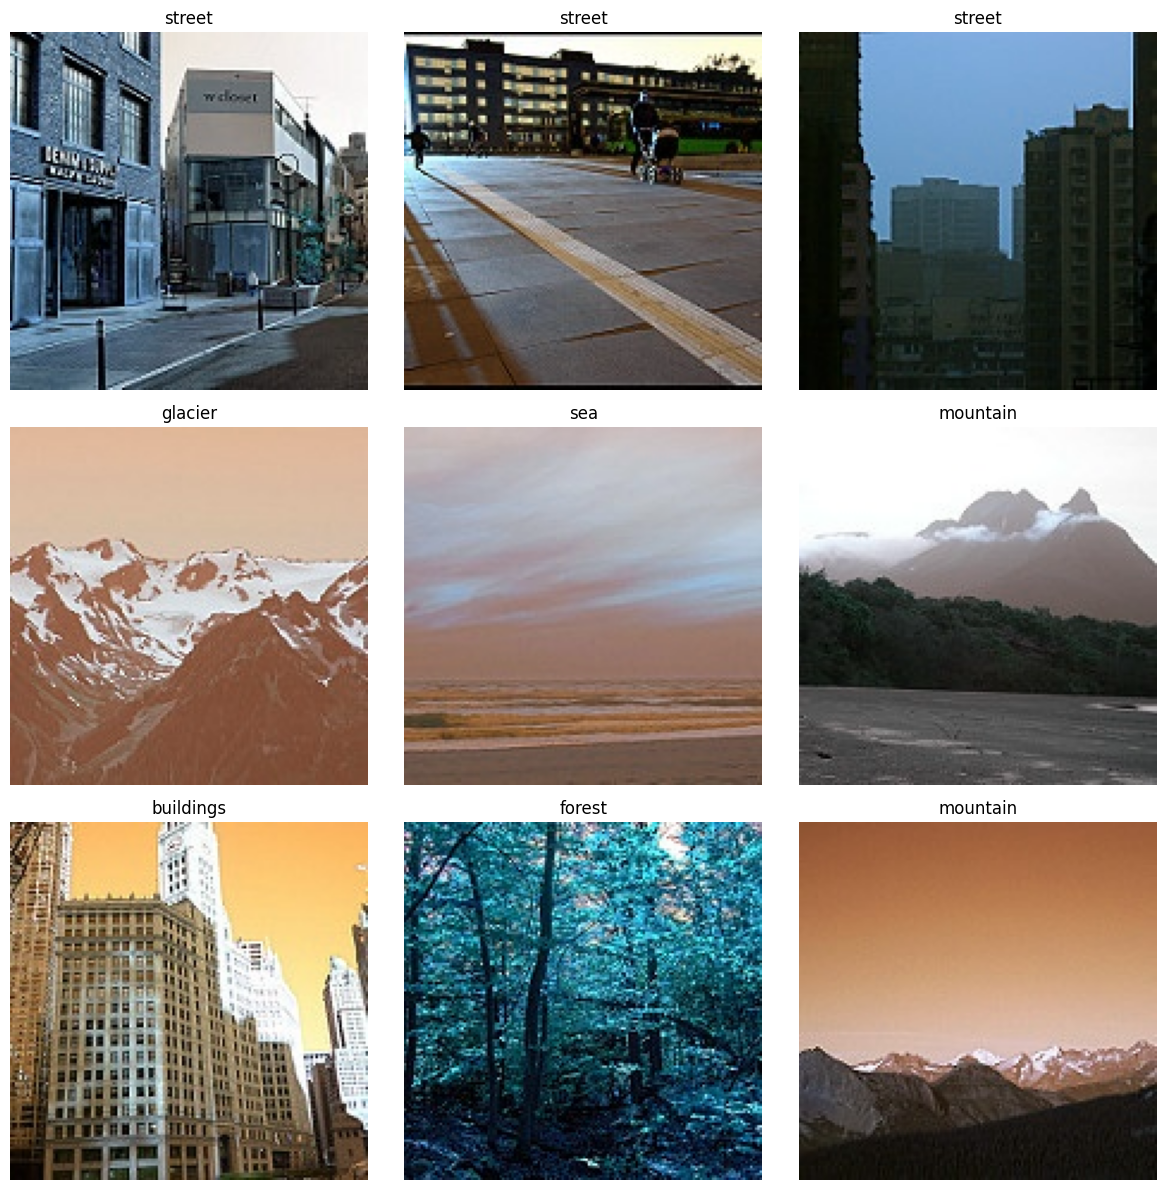

In [60]:
parent_dir = "../Dataset/Intel/seg_pred/"

num_images = 9  # Number of images to predict

img_files = random.sample(os.listdir(parent_dir), num_images)
img_paths = [os.path.join(parent_dir, img) for img in img_files]

inference_grid(img_paths, grid_cols = 3)